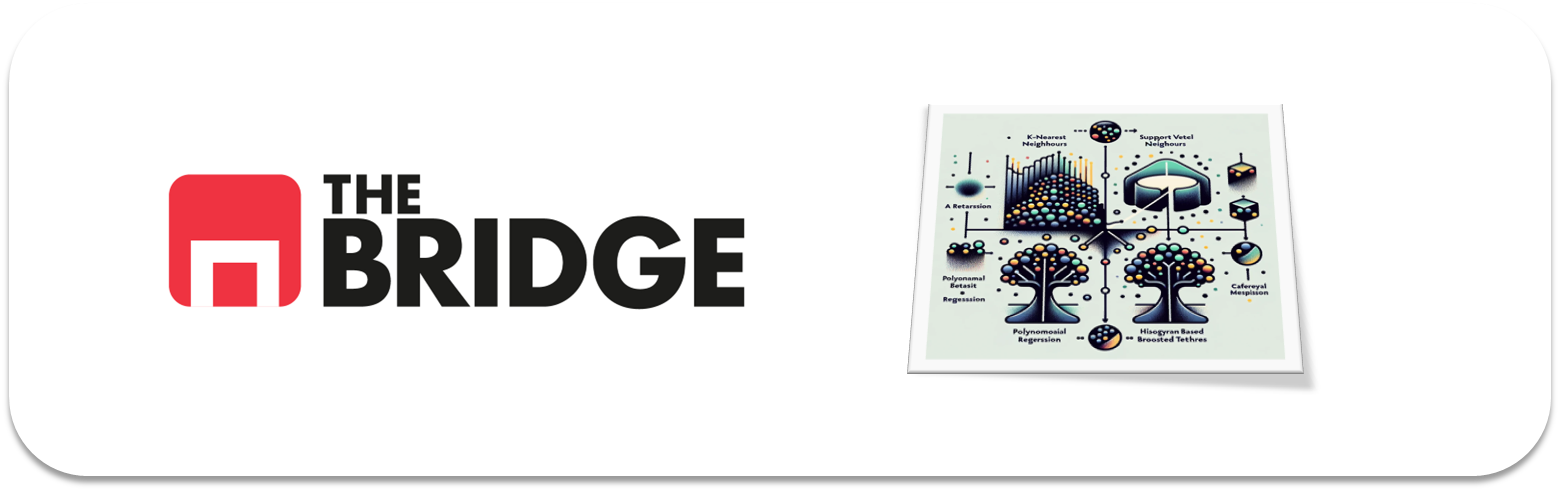

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns

import bootcampviztools as bt

### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [2]:
df=pd.read_csv("./data/wines_dataset.csv",sep="|")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,8.5,0.21,0.26,9.25,0.034,73.0,142.0,0.99450,3.05,0.37,11.4,6,white
1,8.3,0.16,0.37,7.90,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,6,white
2,6.8,0.18,0.38,1.40,0.038,35.0,111.0,0.99180,3.32,0.59,11.2,7,white
3,6.1,0.26,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,white
4,7.5,0.63,0.27,2.00,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.39,0.34,10.00,0.056,35.0,178.0,0.99740,3.26,0.60,10.2,5,white
6493,8.2,0.73,0.21,1.70,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red
6494,7.4,0.31,0.48,14.20,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,white
6495,8.3,0.65,0.10,2.90,0.089,17.0,40.0,0.99803,3.29,0.55,9.5,5,red


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
target_num="alcohol"
target_cat="quality"

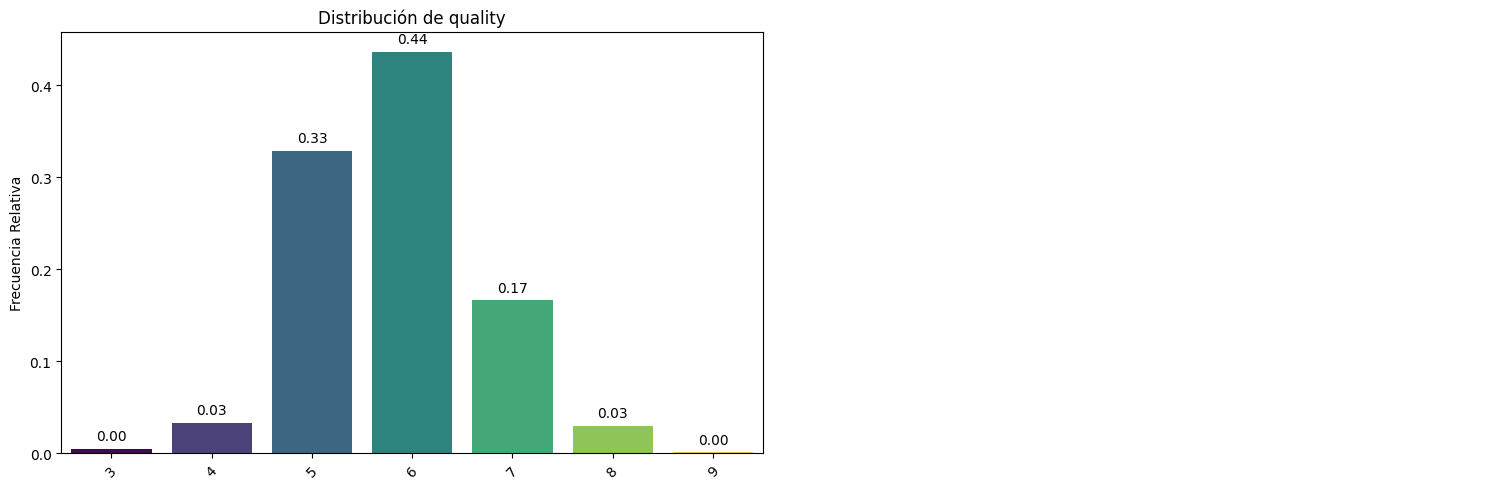

In [6]:
bt.pinta_distribucion_categoricas(df, [target_cat], relativa= True, mostrar_valores= True)

<Axes: xlabel='alcohol', ylabel='Count'>

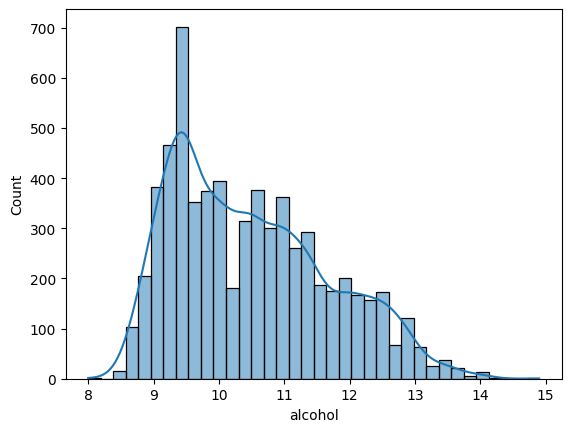

In [7]:
sns.histplot(x = target_num, data = df, kde = True)

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [8]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [9]:
df.columns=df.columns.str.replace(' ','_')
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [10]:
features_num=df.select_dtypes(include=['float64', 'int64'])

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])  # 0 = blanco, 1 = tinto

In [12]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size= 0.2, random_state= 42)

In [13]:

X_train = train_set.drop(target_cat, axis = 1)
y_train = train_set[target_cat]

X_test = test_set.drop(target_cat, axis = 1)
y_test = test_set[target_cat]


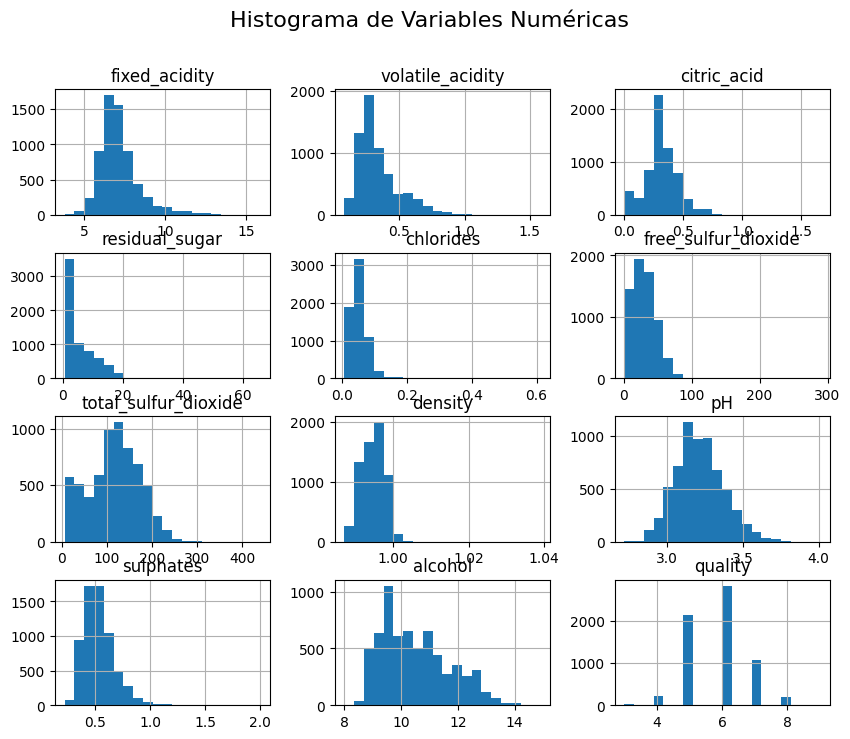

In [14]:
# Pintamos el histograma para cada columna numérica
features_num.hist(bins=20, figsize=(10, 8))
plt.suptitle('Histograma de Variables Numéricas', fontsize=16)
plt.show()

In [54]:

# Estandarizar las variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Verificar que todo está correcto
print(f"Tamaño del set de entrenamiento: {X_train.shape}")
print(f"Tamaño del set de prueba: {X_test.shape}")
print(f"Distribución de clases en entrenamiento:\n{pd.Series(y_train).value_counts(normalize=True)}")

Tamaño del set de entrenamiento: (5197, 12)
Tamaño del set de prueba: (1300, 12)
Distribución de clases en entrenamiento:
quality
6    0.437560
5    0.328266
7    0.167212
4    0.033288
8    0.028093
3    0.004618
9    0.000962
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Distribución de tipos de vino')

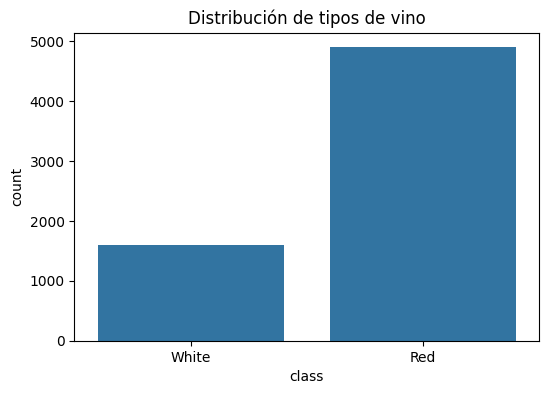

In [17]:
# Ver distribución de la variable 'class'
plt.figure(figsize=(6,4))
sns.countplot(x=df['class'])
plt.xticks(ticks=[0, 1], labels=['White', 'Red'])
plt.title("Distribución de tipos de vino")

In [18]:
#  Media de quality según el tipo de vino
print(df.groupby('class')['quality'].describe())

        count      mean       std  min  25%  50%  75%  max
class                                                     
0      1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
1      4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


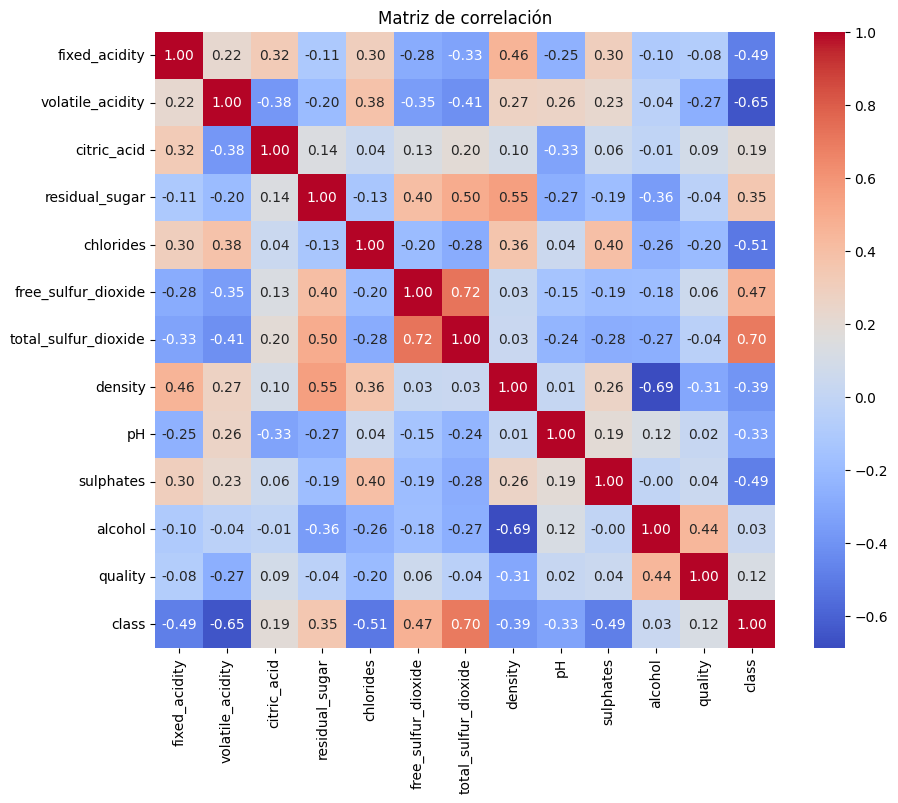

In [19]:

# Correlación entre quality y las demás variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

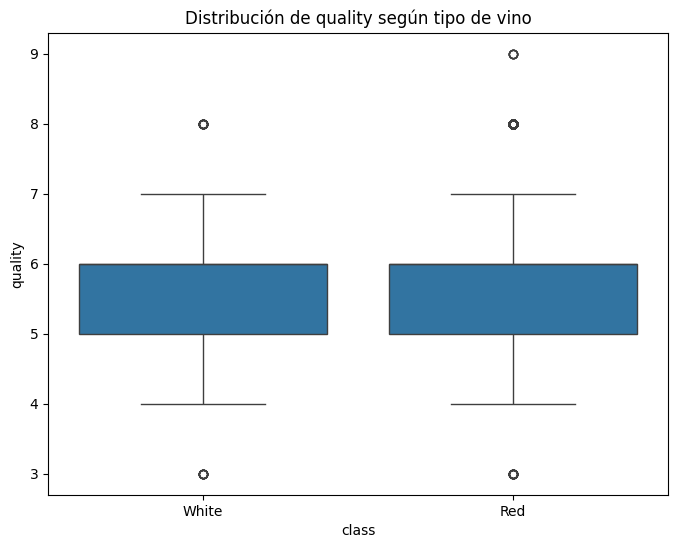

In [20]:
# Comparar quality entre vinos blancos y tintos
plt.figure(figsize=(8,6))
sns.boxplot(x=df['class'], y=df['quality'])
plt.xticks(ticks=[0, 1], labels=['White', 'Red'])
plt.title("Distribución de quality según tipo de vino")
plt.show()

Intentamos localizar los aotliers para saber como tratarlos como vamos a ahce runKNN y es muy sensible los eliminamos tanto para train como para set

In [21]:
# Verificar los valores únicos en la columna 'class'
print("Valores únicos en 'class':")
print(df['class'].unique())

# Verificar los valores únicos en la columna 'quality'
print("\nValores únicos en 'quality':")
print(df['quality'].unique())

Valores únicos en 'class':
[1 0]

Valores únicos en 'quality':
[6 7 3 5 4 8 9]


In [22]:
# Localizar los outliers según la calidad
outliers_quality = df[(df['quality'] < 4) | (df['quality'] > 7)]

# Mostrar el número de outliers y las filas correspondientes
print(f"Número de outliers en 'quality': {outliers_quality.shape[0]}")
print("Primeros outliers encontrados:")
print(outliers_quality[['quality']].head())  # Mostrar los primeros outliers encontrados

Número de outliers en 'quality': 228
Primeros outliers encontrados:
    quality
3         3
17        3
53        8
61        8
62        8


In [23]:
# Filtramos los outliers en y_train y y_test (basándonos en la columna 'quality')
# Se eliminan los valores de calidad menores a 4 o mayores a 7 de ambos conjuntos (train y test)

# Eliminar los outliers en el conjunto de entrenamiento
train_outliers = (y_train >= 4) & (y_train <= 7)
X_train_cleaned = X_train[train_outliers]
y_train_cleaned = y_train[train_outliers]

# Eliminar los outliers en el conjunto de prueba
test_outliers = (y_test >= 4) & (y_test <= 7)
X_test_cleaned = X_test[test_outliers]
y_test_cleaned = y_test[test_outliers]

# Verificar las dimensiones después de la limpieza
print(f"Dimensiones después de eliminar outliers en el entrenamiento: X_train: {X_train_cleaned.shape}, y_train: {y_train_cleaned.shape}")
print(f"Dimensiones después de eliminar outliers en el test: X_test: {X_test_cleaned.shape}, y_test: {y_test_cleaned.shape}")

Dimensiones después de eliminar outliers en el entrenamiento: X_train: (5022, 12), y_train: (5022,)
Dimensiones después de eliminar outliers en el test: X_test: (1247, 12), y_test: (1247,)


Aplicamos logaritmos 

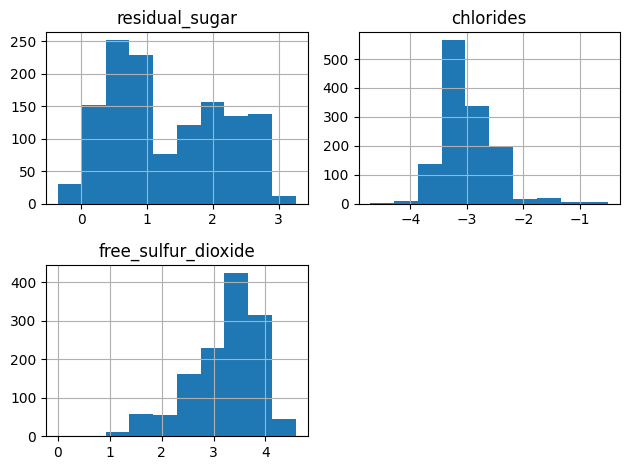

In [24]:
features_transform = ['residual_sugar',
       'chlorides', 'free_sulfur_dioxide'] # Lo aplicamos también en test
for feature in features_transform:
    test_set[feature] = test_set[feature].apply(np.log)

test_set[features_transform].hist()
plt.tight_layout();



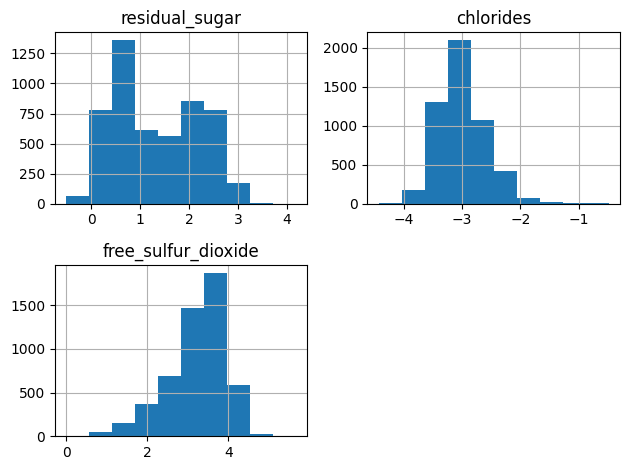

In [25]:
features_transform = ['residual_sugar',
       'chlorides', 'free_sulfur_dioxide'] # Aplico transformación logarítmica a estas variables
for feature in features_transform:
    train_set[feature] = train_set[feature].apply(np.log)

train_set[features_transform].hist()
plt.tight_layout();

Empezamos con el entrenamiento de tres modelos, les aplicamos las vadilacion cruzada, posteriormente hacemos un grid, para buscar los mejores parametros

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Crear el modelo Random Forest
rf = RandomForestClassifier(random_state=42)

# Entrenar el modelo con el conjunto de entrenamiento
rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Validación cruzada
cv_rf = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Random Forest - Cross-Validation Accuracy: {cv_rf.mean():.4f}")

Random Forest - Accuracy: 0.6892307692307692
Random Forest - Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.73      0.19      0.30        43
           5       0.74      0.72      0.73       432
           6       0.66      0.77      0.71       562
           7       0.64      0.57      0.60       210
           8       0.88      0.49      0.63        47

    accuracy                           0.69      1300
   macro avg       0.61      0.46      0.50      1300
weighted avg       0.69      0.69      0.68      1300

Random Forest - Cross-Validation Accuracy: 0.6646


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn = KNeighborsClassifier()

# Entrenar el modelo con el conjunto de entrenamiento
knn.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_knn = knn.predict(X_test)

# Evaluar el modelo
print("KNN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN - Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Validación cruzada
cv_knn = cross_val_score(knn, X_train, y_train, cv=5)
print(f"KNN - Cross-Validation Accuracy: {cv_knn.mean():.4f}")

KNN - Accuracy: 0.5607692307692308
KNN - Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.19      0.12      0.14        43
           5       0.60      0.64      0.62       432
           6       0.59      0.63      0.61       562
           7       0.46      0.42      0.44       210
           8       0.23      0.06      0.10        47

    accuracy                           0.56      1300
   macro avg       0.34      0.31      0.32      1300
weighted avg       0.54      0.56      0.55      1300

KNN - Cross-Validation Accuracy: 0.5534


In [28]:
# Reindexar las clases de calidad a valores consecutivos desde 0 hasta 7
y_train_reindexed = y_train - 3
y_test_reindexed = y_test - 3

# Crear el modelo XGBoost
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')

# Entrenar el modelo con el conjunto de entrenamiento (usando las clases reindexadas)
xgb_model.fit(X_train, y_train_reindexed)

# Predecir en el conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report

print("XGBoost - Accuracy:", accuracy_score(y_test_reindexed, y_pred_xgb))
print("XGBoost - Classification Report:")
print(classification_report(y_test_reindexed, y_pred_xgb))

XGBoost - Accuracy: 0.6723076923076923
XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.67      0.23      0.34        43
           2       0.72      0.70      0.71       432
           3       0.65      0.73      0.69       562
           4       0.61      0.60      0.60       210
           5       0.85      0.49      0.62        47

    accuracy                           0.67      1300
   macro avg       0.58      0.46      0.50      1300
weighted avg       0.67      0.67      0.67      1300



In [29]:
from sklearn.model_selection import cross_val_score

# Evaluar Random Forest con validación cruzada (sin optimización de hiperparámetros)
rf = RandomForestClassifier(random_state=42)
cv_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='recall_weighted')
print(f"Random Forest - Cross-Validation Recall (sin optimización): {cv_rf.mean():.4f}")



Random Forest - Cross-Validation Recall (sin optimización): 0.6646


In [30]:

# Evaluar KNN con validación cruzada (sin optimización de hiperparámetros)
knn = KNeighborsClassifier()
cv_knn = cross_val_score(knn, X_train, y_train, cv=5, scoring='recall_weighted')
print(f"KNN - Cross-Validation Recall (sin optimización): {cv_knn.mean():.4f}")


KNN - Cross-Validation Recall (sin optimización): 0.5534


In [31]:
''' import xgboost as xgb
# Evaluar XGBoost con validación cruzada (sin optimización de hiperparámetros)
xgb_model = xgb.XGBClassifier(random_state=42, eval_metric='mlogloss')
cv_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='recall_weighted')
print(f"XGBoost - Cross-Validation Recall (sin optimización): {cv_xgb.mean():.4f}")'''

' import xgboost as xgb\n# Evaluar XGBoost con validación cruzada (sin optimización de hiperparámetros)\nxgb_model = xgb.XGBClassifier(random_state=42, eval_metric=\'mlogloss\')\ncv_xgb = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring=\'recall_weighted\')\nprint(f"XGBoost - Cross-Validation Recall (sin optimización): {cv_xgb.mean():.4f}")'

In [32]:
from sklearn.model_selection import GridSearchCV

# Random Forest: Optimización con GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='recall_weighted')
grid_search_rf.fit(X_train, y_train)

# Evaluar el modelo Random Forest con los mejores parámetros
cv_rf_optimized = grid_search_rf.best_score_
print(f"Random Forest - Cross-Validation Recall (con optimización): {cv_rf_optimized:.4f}")

# KNN: Optimización con GridSearchCV
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='recall_weighted')
grid_search_knn.fit(X_train, y_train)

# Evaluar el modelo KNN con los mejores parámetros
cv_knn_optimized = grid_search_knn.best_score_
print(f"KNN - Cross-Validation Recall (con optimización): {cv_knn_optimized:.4f}")

Random Forest - Cross-Validation Recall (con optimización): 0.6735
KNN - Cross-Validation Recall (con optimización): 0.6456


Conclusiones:

* El Random Forest es el modelo que mejor rendimiento tiene en general, con un recall más alto que KNN y accuracy también superior.
* La optimización de hiperparámetros es crucial para mejorar el rendimiento del modelo, especialmente en la clasificación de las clases minoritarias.
* El manejo de clases desbalanceadas será clave para mejorar el recall, y los pesos de clase o técnicas como SMOTE pueden ser muy útiles.
* Habría que probar un modelo ensemble o ajustar los umbrales de predicción para obtener mejores resultados.

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

Simplemente hayo las corelaciones para iniciar los nuevos modelos de entrenamiento con las variables que mejor dfinan nuestro target nuevo

In [33]:
corr = train_set.corr(numeric_only = True)

In [34]:
corr[target_num].sort_values(ascending = False)

alcohol                 1.000000
quality                 0.450403
pH                      0.116497
class                   0.026966
sulphates               0.000412
citric_acid            -0.005690
volatile_acidity       -0.036041
fixed_acidity          -0.091964
free_sulfur_dioxide    -0.148186
total_sulfur_dioxide   -0.272970
residual_sugar         -0.309084
chlorides              -0.369663
density                -0.682345
Name: alcohol, dtype: float64

In [35]:
serie_corr = np.abs(corr[target_num]).sort_values(ascending = False)
serie_corr

alcohol                 1.000000
density                 0.682345
quality                 0.450403
chlorides               0.369663
residual_sugar          0.309084
total_sulfur_dioxide    0.272970
free_sulfur_dioxide     0.148186
pH                      0.116497
fixed_acidity           0.091964
volatile_acidity        0.036041
class                   0.026966
citric_acid             0.005690
sulphates               0.000412
Name: alcohol, dtype: float64

In [36]:
criterio = 0.11 # Fijamos un criterio para seleccionar nuestras features numéricas

features_corr = serie_corr[serie_corr > criterio].index.to_list()
features_corr.remove(target_num)

In [37]:
features_corr

['density',
 'quality',
 'chlorides',
 'residual_sugar',
 'total_sulfur_dioxide',
 'free_sulfur_dioxide',
 'pH']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Crear X e y (las características y el target)
X = df[features_corr]  # Seleccionar las columnas especificadas en futures_corr
y = df['alcohol']  # El target es la variable 'alcohol'

X_train = train_set[features_corr]
y_train = train_set[target_num]

X_test = test_set[features_corr]
y_test = test_set[target_num]


Empezamos a entrenar los modelos en este caso de regresion, con nuestra nueva variable objetivo

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



model_lr = LinearRegression()


model_lr.fit(X_train, y_train)


y_pred = model_lr.predict(X_test)

# 4. Evaluar el modelo

# R^2 (Coeficiente de determinación)
r2 = r2_score(y_test, y_pred)

# MAE (Error absoluto medio)
mae = mean_absolute_error(y_test, y_pred)

# RMSE (Raíz del error cuadrático medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


print(f"R^2: {r2:.4f}")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")

R^2: 0.6317
MAE: 0.5598
RMSE: 0.7205


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



model_rf = RandomForestRegressor(random_state=42)


model_rf.fit(X_train, y_train)


y_pred_rf = model_rf.predict(X_test)

# 4. Evaluar el modelo

# R^2 (Coeficiente de determinación)
r2_rf = r2_score(y_test, y_pred_rf)

# MAE (Error absoluto medio)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# RMSE (Raíz del error cuadrático medio)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Imprimir resultados
print("Random Forest Regressor:")
print(f"R^2: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")

Random Forest Regressor:
R^2: 0.8414
MAE: 0.3143
RMSE: 0.4728


In [47]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_xgb = XGBRegressor(random_state=42)


model_xgb.fit(X_train, y_train)


y_pred_xgb = model_xgb.predict(X_test)

# 4. Evaluar el modelo

# R^2 (Coeficiente de determinación)
r2_xgb = r2_score(y_test, y_pred_xgb)

# MAE (Error absoluto medio)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# RMSE (Raíz del error cuadrático medio)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))


print("XGBoost Regressor:")
print(f"R^2: {r2_xgb:.4f}")
print(f"MAE: {mae_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")

XGBoost Regressor:
R^2: 0.8352
MAE: 0.3344
RMSE: 0.4820


In [50]:
# Realizar validación cruzada (con 5 particiones)
cv_scores = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Mostrar los resultados
print("MAE en cada partición:", -cv_scores)  # Recordemos que el valor es negativo, lo revertimos
print("MAE promedio en validación cruzada:", -cv_scores.mean())  # Promedio del MAE

MAE en cada partición: [0.56900987 0.57519178 0.55224183 0.54680479 0.54522325]
MAE promedio en validación cruzada: 0.5576943043573961


In [52]:
# Realizamos la validación cruzada
cv_scores_rf = cross_val_score(model_rf, X, y, cv=5, scoring='neg_mean_absolute_error')

# Imprimir los resultados de la validación cruzada
print("Random Forest Regressor - Validación Cruzada (MAE):")
print(f"Mean Cross-Validated MAE: {-cv_scores_rf.mean():.4f}")

Random Forest Regressor - Validación Cruzada (MAE):
Mean Cross-Validated MAE: 0.3211


1.	El Random Forest ha mostrado un rendimiento superior comparado con Linear Regression en cuanto al error absoluto medio (MAE), lo que sugiere que es un mejor modelo para este conjunto de datos, especialmente cuando hay relaciones no lineales complejas.
2.	Aunque Linear Regression tiene un MAE aceptable (0.55), su capacidad de predicción se ve limitada por su naturaleza lineal.
3.	La validación cruzada en Random Forest (con un MAE de 0.32) ha confirmado que este modelo es robusto y tiene un buen desempeño en general.
4.	La validación cruzada es una herramienta útil para verificar la estabilidad de los modelos y evitar sobreajuste.
5.	En resumen, el Random Forest es más adecuado para este conjunto de datos, aunque se puede mejorar aún más optimizando sus hiperparámetros.

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definir el modelo base de Random Forest
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros que vamos a probar
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],   # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras necesarias en una hoja
    'max_features': ['auto', 'sqrt', 'log2']  # Número de características a considerar para la división de nodos
}

# Inicializar el GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros y el rendimiento correspondiente
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor MAE encontrado:", -grid_search.best_score_)  # Recordemos que es negativo por la forma en que se calcula

C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
476 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\skl

Mejores parámetros encontrados: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor MAE encontrado: 0.35769782249592086


Conclusiones

El Random Forest sigue siendo un modelo fuerte con un MAE de 0.35 tras la optimización de hiperparámetros, lo que demuestra que, con parámetros bien ajustados, es muy adecuado para predecir el grado alcohólico de los vinos. Si bien la optimización de parámetros no mejoró sustancialmente el MAE en comparación con la validación cruzada anterior (MAE = 0.32), el modelo aún ofrece predicciones precisas y es robusto. El siguiente paso debería ser analizar más a fondo los errores para determinar si hay áreas donde el modelo puede mejorar y probar otros enfoques de optimización si es necesario.